In [2]:
from itertools import combinations
import numpy as np
from sklearn import manifold

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# construct a liner_code class

class linear_code():
    
    # shape is code parameter [n, k]
    # F is code Field
    def __init__(self, shape, F):
        self.shape = shape
        self.F = F
    
    '''
    suppose the format of code is standard format, thus the first k columns of
    compose identify matrix. The generate method is to enumerate varies of last
    n-k columns, and the shape is to squeeze that. So, the output is an one-dimension
    of ((n-k)*k,1)
    ''' 
    
    def generate_all_codes(self):
        n = self.shape[0]
        k = self.shape[1]
        num_elements = np.arange((n-k)*k)
        comb = []
        for i in range(num_elements.shape[0]):
            result = []
            for c in combinations(num_elements, i):
                result.append(c)
            comb.extend(result)
        comb[0] = tuple(np.arange((n-k)*k))
        
        self.all_codes = np.zeros([len(comb), (n-k)*k], dtype=np.int8)
        for i in range(len(comb)):
            self.all_codes[i, list(comb[i])] = 1
        return self.all_codes

    #compute distance
    
    def compute_distance(self):
        self.all_codes_distance = np.zeros(self.all_codes.shape[0]).astype(np.int8)

        for i in range(len(all_codes)):
            #combine identify matrix and varies of lastn-k columns
            G_matrix = np.concatenate([np.eye(self.shape[1]), self.all_codes[i].reshape(self.shape[1],self.shape[0]-self.shape[1])], axis=1).astype(np.int8)
            linear_code = LinearCode(Matrix(GF(self.F), G_matrix))
            self.all_codes_distance[i] = linear_code.minimum_distance()#return min_weight
        
        return self.all_codes_distance
    
    # t_sne visual 
    def t_sne(self, n_components=2):
        
        def t_sne_2(all_codes=self.all_codes, all_codes_distance=self.all_codes_distance):
            tsne = manifold.TSNE(n_components=2)
            X = tsne.fit_transform(all_codes)
            plt.figure()
            plt.scatter(X[:, 0], X[:, 1], c=all_codes_distance, cmap=plt.cm.Spectral)
        
        def t_sne_3(all_codes=self.all_codes, all_codes_distance=self.all_codes_distance):
            tsne = manifold.TSNE(n_components=3)
            X = tsne.fit_transform(all_codes)
            fig = plt.figure(figsize=(8, 8))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=all_codes_distance, cmap=plt.cm.Spectral,)
            ax.view_init(4, -72)
            
        if n_components==2:
            t_sne_2()
        else:
            t_sne_3()


In [8]:
L_C = linear_code([7,4], 2)
all_codes = L_C.generate_all_codes()
all_codes_distance = L_C.compute_distance()

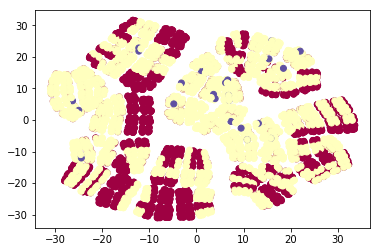

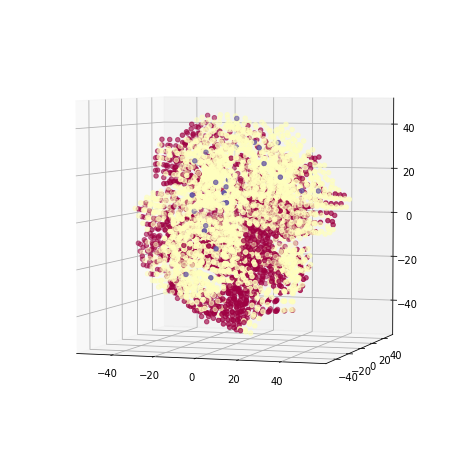

In [9]:
# visual

L_C.t_sne()
L_C.t_sne(n_components=3)

In [10]:
# statistics of the numbers of different distances

for i in range(all_codes_distance.min(), all_codes_distance.max()+1, 1):
    num = np.sum(all_codes_distance==i)
    print('number of distance {} is {}'.format(i, num))

number of distance 1 is 1694
number of distance 2 is 2377
number of distance 3 is 24


In [11]:
sorts = {}
for i in range(all_codes_distance.min(), all_codes_distance.max()+1, 1):
    sorts['{}'.format(i)] = all_codes[all_codes_distance==i]

Here, we put a question : Can we seperate the different distances of codes?
    
If yes, How we do?

If no, Why can't?

Let's have a try!

---

In fact, the t-SNE method is similar to PCA, we could find a detail: the 
blue points mainly locate at top zone. To find if detail exists, we only
draw the blue points on 3d and other points are red

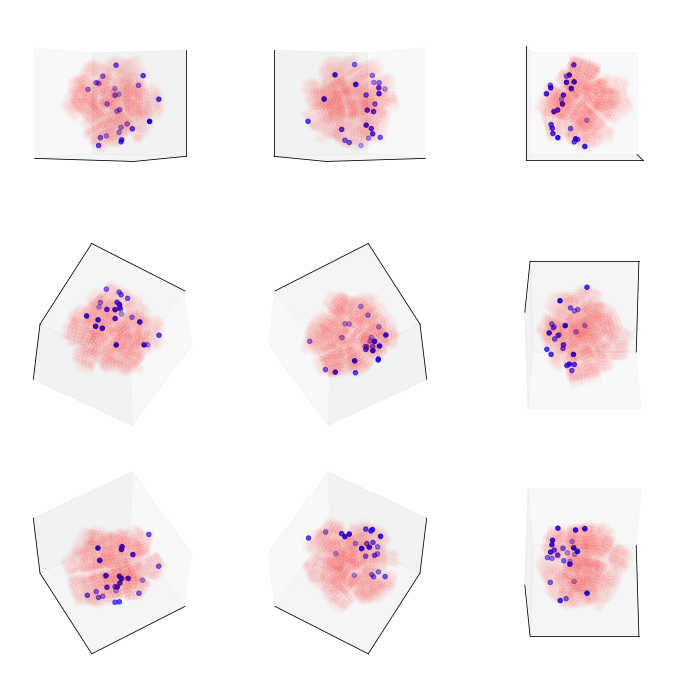

In [30]:
tsne = manifold.TSNE(n_components=3)
X = tsne.fit_transform(all_codes)
fig = plt.figure(figsize=(12, 12))

for i in range(3):
    for j in range(1,4,1):
        ax = fig.add_subplot(330+i*3+j, projection='3d')
        X_blue = X[all_codes_distance==all_codes_distance.max()]
        X_red = X[all_codes_distance!=all_codes_distance.max()]
        ax.scatter(X_blue[:, 0], X_blue[:, 1], X_blue[:, 2], c='blue', cmap=plt.cm.Spectral, label='1')
        ax.scatter(X_red[:, 0], X_red[:, 1], X_red[:, 2], c='red', alpha=0.01, cmap=plt.cm.Spectral, label='0')
        ax.view_init(i*120, j*120)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])


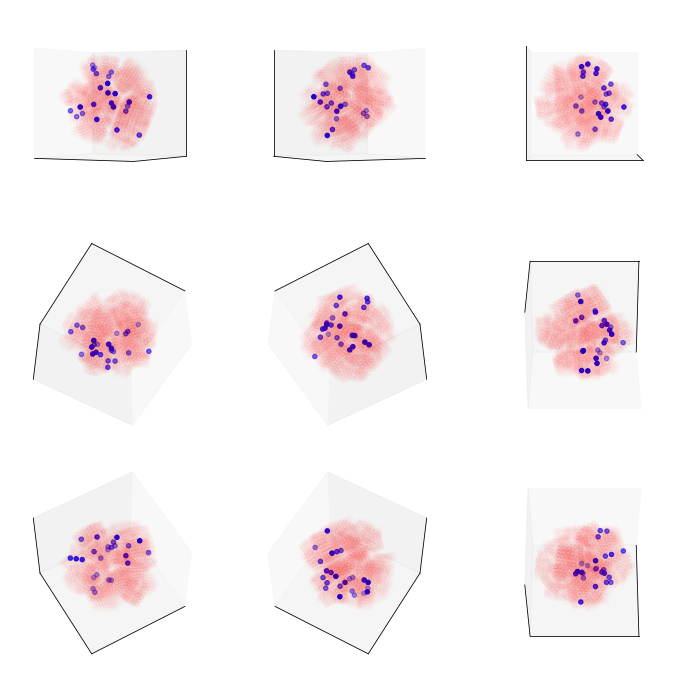

In [31]:
L_C_ = linear_code([8,5], 2)
all_codes = L_C.generate_all_codes()
all_codes_distance = L_C.compute_distance()

tsne = manifold.TSNE(n_components=3)
X = tsne.fit_transform(all_codes)
fig = plt.figure(figsize=(12, 12))

for i in range(3):
    for j in range(1,4,1):
        ax = fig.add_subplot(330+i*3+j, projection='3d')
        X_blue = X[all_codes_distance==all_codes_distance.max()]
        X_red = X[all_codes_distance!=all_codes_distance.max()]
        ax.scatter(X_blue[:, 0], X_blue[:, 1], X_blue[:, 2], c='blue', cmap=plt.cm.Spectral, label='1')
        ax.scatter(X_red[:, 0], X_red[:, 1], X_red[:, 2], c='red', alpha=0.01, cmap=plt.cm.Spectral, label='0')
        ax.view_init(i*120, j*120)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

In [ ]:
L_C = linear_code([9,5], 2)
all_codes = L_C.generate_all_codes()
all_codes_distance = L_C.compute_distance()
L_C.t_sne()
L_C.t_sne(n_components=3)